In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('CreditCardDataset.csv')


In [3]:
dataset

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [5]:
dataset.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [6]:
dataset=dataset.dropna(subset=['Amount'])
dataset=dataset.dropna(subset=['Merchant Group'])
dataset=dataset.dropna(subset=['Country of Transaction'])
dataset=dataset.dropna(subset=['Shipping Address'])
dataset=dataset.dropna(subset=['Country of Residence'])
dataset=dataset.dropna(subset=['Gender'])
dataset=dataset.dropna(subset=['Age'])
dataset=dataset.dropna(subset=['Bank'])
dataset=dataset.dropna(subset=['Fraud'])

In [7]:
dataset.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [8]:
dataset['Amount'] = dataset['Amount'].replace({'£': ''}, regex=True).astype(float)
dataset['Amount'] = dataset['Amount'].astype(int)
dataset['Amount'] = pd.to_numeric(dataset['Amount'])

In [9]:
columns_to_drop = ['Transaction ID','Date','Gender','Age', 'Shipping Address']
dataset = dataset.drop(columns=columns_to_drop)

In [10]:
dataset

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Bank,Fraud
0,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,RBS,0
1,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,Lloyds,0
2,Wednesday,14,Visa,Tap,5,POS,Restaurant,India,India,Barclays,0
3,Tuesday,14,Visa,Tap,28,POS,Entertainment,United Kingdom,United Kingdom,Barclays,0
4,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,United Kingdom,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,Tuesday,22,MasterCard,Tap,15,POS,Electronics,United Kingdom,United Kingdom,Halifax,0
99996,Wednesday,23,MasterCard,PIN,7,ATM,Children,Russia,Russia,Barclays,0
99997,Tuesday,11,MasterCard,PIN,21,ATM,Subscription,United Kingdom,United Kingdom,HSBC,0
99998,Wednesday,22,Visa,Tap,25,POS,Products,United Kingdom,United Kingdom,Barclays,0


In [11]:
final_dataset=dataset

In [12]:
final_dataset.reset_index(drop=True, inplace=True)

In [13]:
final_dataset

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Bank,Fraud
0,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,RBS,0
1,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,Lloyds,0
2,Wednesday,14,Visa,Tap,5,POS,Restaurant,India,India,Barclays,0
3,Tuesday,14,Visa,Tap,28,POS,Entertainment,United Kingdom,United Kingdom,Barclays,0
4,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,United Kingdom,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...
99972,Tuesday,22,MasterCard,Tap,15,POS,Electronics,United Kingdom,United Kingdom,Halifax,0
99973,Wednesday,23,MasterCard,PIN,7,ATM,Children,Russia,Russia,Barclays,0
99974,Tuesday,11,MasterCard,PIN,21,ATM,Subscription,United Kingdom,United Kingdom,HSBC,0
99975,Wednesday,22,Visa,Tap,25,POS,Products,United Kingdom,United Kingdom,Barclays,0


In [14]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
original_data = final_dataset.copy()

# Encode categorical columns for correlation check
label_encoders = {}
categorical_columns = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction',
                       'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Bank']

for col in categorical_columns:
    le = LabelEncoder()
    final_dataset[col] = le.fit_transform(final_dataset[col])
    label_encoders[col] = le


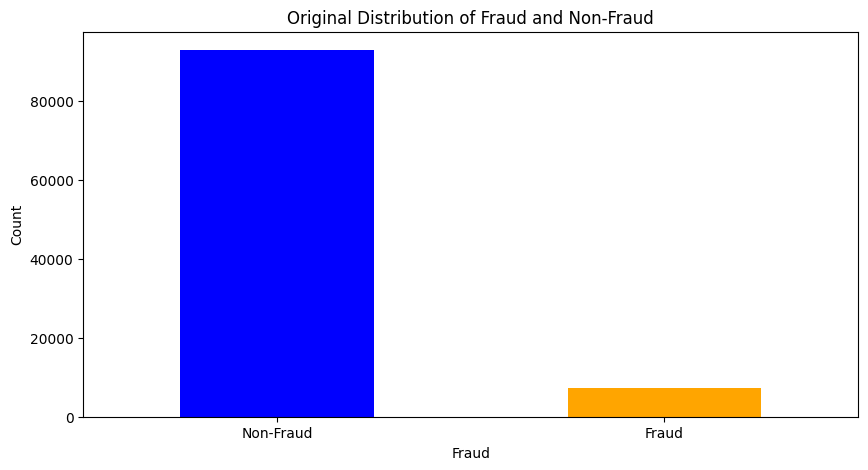

In [15]:
import matplotlib.pyplot as plt
# Visualize the original distribution of the target variable
plt.figure(figsize=(10, 5))
original_counts = final_dataset['Fraud'].value_counts()
original_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Distribution of Fraud and Non-Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [16]:
correlation_matrix = final_dataset.corr()
print(correlation_matrix)

                        Day of Week      Time  Type of Card  Entry Mode  \
Day of Week                1.000000 -0.002388      0.000120    0.001651   
Time                      -0.002388  1.000000     -0.014785    0.008078   
Type of Card               0.000120 -0.014785      1.000000    0.005694   
Entry Mode                 0.001651  0.008078      0.005694    1.000000   
Amount                     0.009368  0.030047      0.001351   -0.185108   
Type of Transaction       -0.000305 -0.009456     -0.003484    0.295332   
Merchant Group             0.004852  0.020254     -0.000028   -0.002886   
Country of Transaction     0.000556  0.092110      0.001301   -0.004392   
Country of Residence      -0.001927 -0.028638      0.000984   -0.000571   
Bank                      -0.002141  0.006308     -0.003393    0.001013   
Fraud                     -0.011734 -0.286283      0.034850   -0.007564   

                          Amount  Type of Transaction  Merchant Group  \
Day of Week             0.

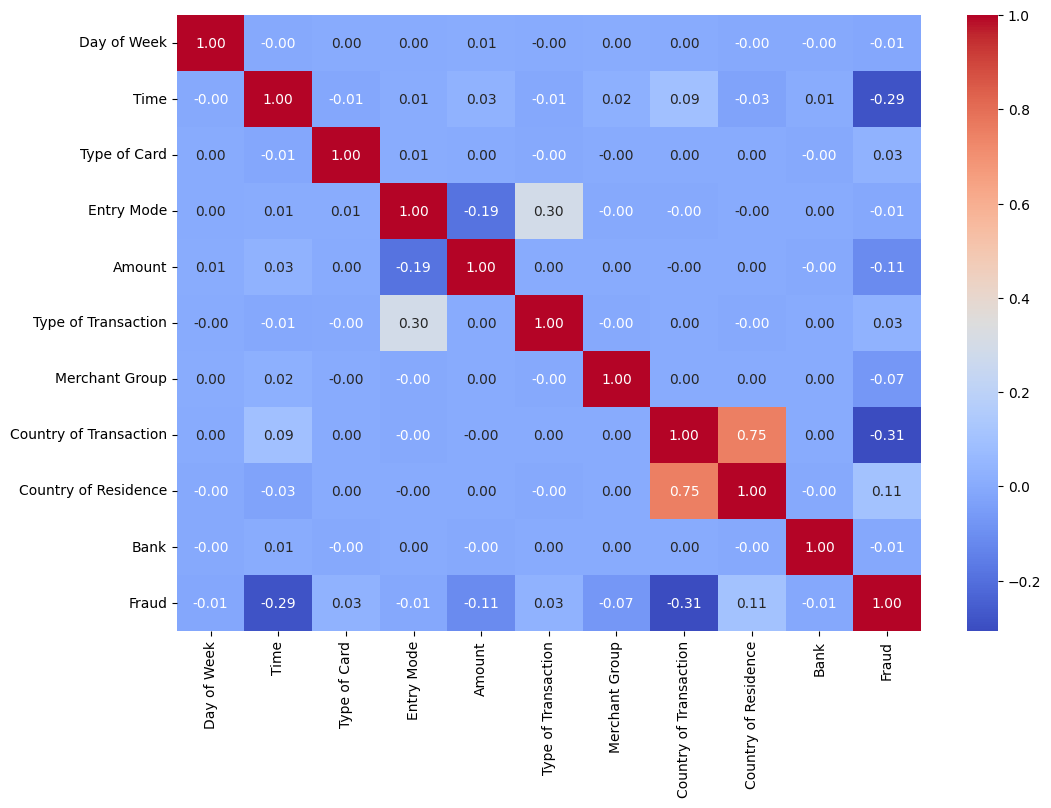

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [18]:
# Separate features and target variable
X = final_dataset.drop('Fraud', axis=1)
y = final_dataset['Fraud']

In [19]:
# Apply SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target variable back into a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Fraud'] = y_resampled

In [20]:
resampled_data

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Bank,Fraud
0,3,19,1,2,5,2,2,4,4,7,0
1,3,17,0,1,288,2,8,3,3,4,0
2,3,14,1,2,5,2,7,1,1,0,0
3,2,14,1,2,28,2,2,4,4,0,0
4,2,23,1,0,91,1,1,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
185565,2,2,0,2,17,2,3,2,4,3,1
185566,2,17,1,0,254,0,0,1,4,4,1
185567,2,3,0,0,15,0,3,2,4,0,1
185568,2,12,1,2,7,2,8,3,4,5,1


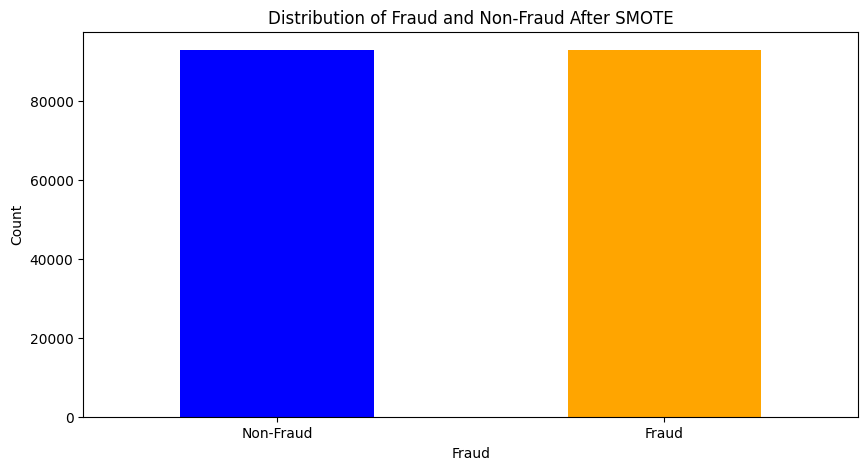

In [21]:
# Visualize the distribution of the target variable after oversampling
plt.figure(figsize=(10, 5))
resampled_counts = resampled_data['Fraud'].value_counts()
resampled_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Fraud and Non-Fraud After SMOTE')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [22]:
for col in categorical_columns:
    le = label_encoders[col]
    resampled_data[col] = le.inverse_transform(resampled_data[col].astype(int))

In [23]:
final_dataset = resampled_data
final_dataset

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Bank,Fraud
0,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,RBS,0
1,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,Lloyds,0
2,Wednesday,14,Visa,Tap,5,POS,Restaurant,India,India,Barclays,0
3,Tuesday,14,Visa,Tap,28,POS,Entertainment,United Kingdom,United Kingdom,Barclays,0
4,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,United Kingdom,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...
185565,Tuesday,2,MasterCard,Tap,17,POS,Fashion,Russia,United Kingdom,Halifax,1
185566,Tuesday,17,Visa,CVC,254,ATM,Children,India,United Kingdom,Lloyds,1
185567,Tuesday,3,MasterCard,CVC,15,ATM,Fashion,Russia,United Kingdom,Barclays,1
185568,Tuesday,12,Visa,Tap,7,POS,Services,USA,United Kingdom,Metro,1


In [24]:
final_dataset.to_csv("Cleaned_data.csv")

In [25]:
final_dataset

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Country of Residence,Bank,Fraud
0,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,RBS,0
1,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,Lloyds,0
2,Wednesday,14,Visa,Tap,5,POS,Restaurant,India,India,Barclays,0
3,Tuesday,14,Visa,Tap,28,POS,Entertainment,United Kingdom,United Kingdom,Barclays,0
4,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,United Kingdom,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...
185565,Tuesday,2,MasterCard,Tap,17,POS,Fashion,Russia,United Kingdom,Halifax,1
185566,Tuesday,17,Visa,CVC,254,ATM,Children,India,United Kingdom,Lloyds,1
185567,Tuesday,3,MasterCard,CVC,15,ATM,Fashion,Russia,United Kingdom,Barclays,1
185568,Tuesday,12,Visa,Tap,7,POS,Services,USA,United Kingdom,Metro,1


In [26]:
X=final_dataset.drop(columns=['Fraud'])
y=final_dataset['Fraud']

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

columns_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
     ['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
      'Country of Transaction', 'Country of Residence', 'Bank', 'Day of Week']),
    # Apply scaling to numeric columns if needed
    (StandardScaler(), ['Amount','Time']),
    remainder='passthrough'  # Keeps any remaining columns unchanged
)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipeline = make_pipeline(
    columns_trans,
    RandomForestClassifier(n_estimators=200, random_state=42)
)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type of Card', 'Entry Mode',
                                                   'Type of Transaction',
                                                   'Merchant Group',
                                                   'Country of Transaction',
                                                   'Country of Residence',
                                                   'Bank', 'Day of Week']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Amount', 'Time'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [30]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18094   444]
 [  262 18314]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18538
           1       0.98      0.99      0.98     18576

    accuracy                           0.98     37114
   macro avg       0.98      0.98      0.98     37114
weighted avg       0.98      0.98      0.98     37114



In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.980977528695371


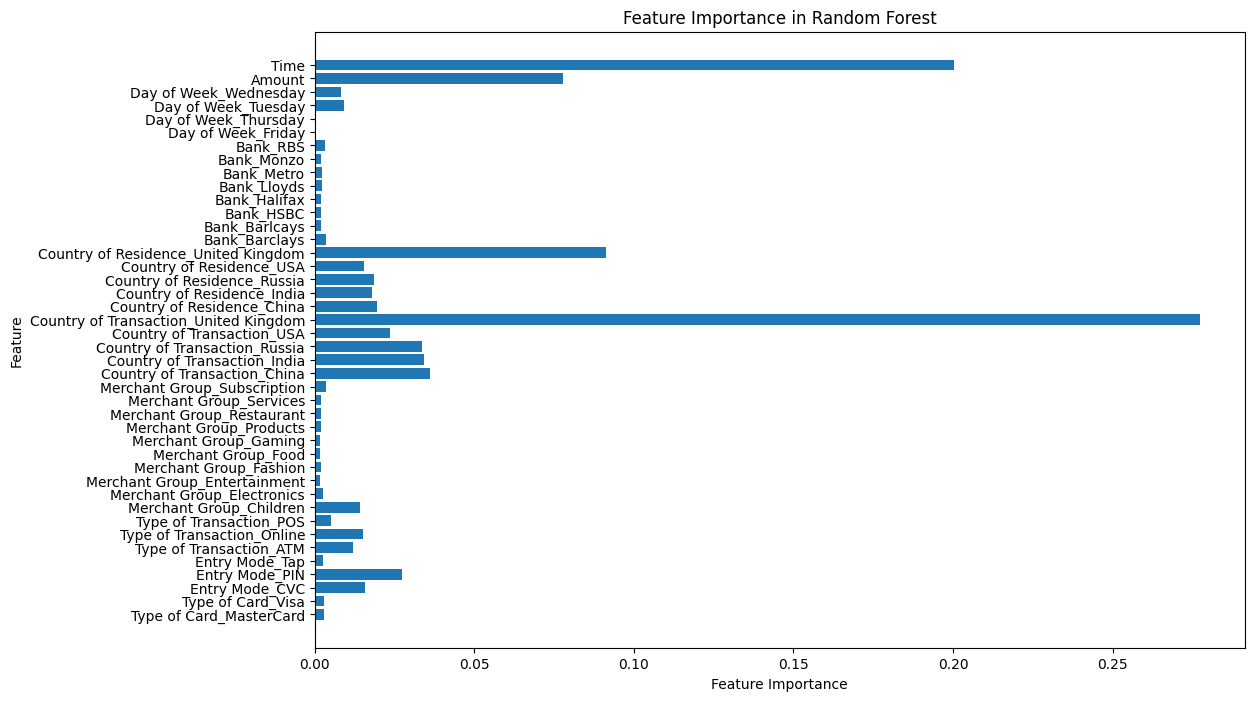

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the model if not already fitted
pipeline.fit(X_train, y_train)

# Extract feature importances
random_forest_model = pipeline.named_steps['randomforestclassifier']
feature_importances = random_forest_model.feature_importances_

# Get the transformed feature names
onehot_columns = pipeline.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
numeric_columns = ['Amount', 'Time']
all_feature_names = np.concatenate((onehot_columns, numeric_columns))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(all_feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.96583499 0.98531551 0.98531551 0.98491135 0.98566579]
Mean cross-validation score:  0.9814086328609151


In [34]:
# Sort data by time if not already sorted
final_dataset.sort_values('Time', inplace=True)

# Split data based on time
split_point = int(len(final_dataset) * 0.8)
X_train_time = final_dataset.iloc[:split_point].drop(columns=['Fraud'])
y_train_time = final_dataset.iloc[:split_point]['Fraud']
X_test_time = final_dataset.iloc[split_point:].drop(columns=['Fraud'])
y_test_time = final_dataset.iloc[split_point:]['Fraud']

# Train and evaluate the model with time-based split
pipeline.fit(X_train_time, y_train_time)
y_pred_time = pipeline.predict(X_test_time)
print(confusion_matrix(y_test_time, y_pred_time))
print(classification_report(y_test_time, y_pred_time))
accuracy_time = accuracy_score(y_test_time, y_pred_time)
print("Time-based Split Accuracy:", accuracy_time)


[[24405   483]
 [ 1364 10862]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     24888
           1       0.96      0.89      0.92     12226

    accuracy                           0.95     37114
   macro avg       0.95      0.93      0.94     37114
weighted avg       0.95      0.95      0.95     37114

Time-based Split Accuracy: 0.9502344128900145


In [35]:
from sklearn.model_selection import train_test_split

# Assuming 'final_dataset' is your full dataset
train_data, validation_data = train_test_split(final_dataset, test_size=0.2, random_state=42)  # Adjust test_size as needed

X_val = validation_data.drop(columns=['Fraud'])
y_val = validation_data['Fraud']

# Assuming 'pipeline' is your trained model, replace this if you have a different model
best_model_random = pipeline

# Evaluate the model on validation data
y_val_pred = best_model_random.predict(X_val)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

[[18384   102]
 [  294 18334]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18486
           1       0.99      0.98      0.99     18628

    accuracy                           0.99     37114
   macro avg       0.99      0.99      0.99     37114
weighted avg       0.99      0.99      0.99     37114

Validation Accuracy: 0.989330171902786


In [36]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']